# Script for network generation

**Imports:**

In [141]:
import numpy as np
import networkx as nx
import pandas as pd
from pyvis.network import Network
import matplotlib.pyplot as plt

**General functions:**

In [162]:
def get_adjacency_matrix(graph):
    print("Adjacency matrix:")
    m = nx.adjacency_matrix(graph).todense()
    for row in m:
        print(row) 


def get_degree_histogram(graph):
    fig, ax = plt.subplots()
    degree_sequence = sorted((d for n, d in graph.degree()), reverse=True)
    ax.bar(*np.unique(degree_sequence, return_counts=True))
    ax.set_title("Degree histogram")
    ax.set_xlabel("Degree")
    ax.set_ylabel("# of Nodes")
    plt.show()


def get_degree_distribution(graph):
    N = graph.number_of_nodes()  # Total number of nodes
    y = np.array(nx.degree_histogram(graph))/N  # All occurrences of "n" degree, divided by total number of nodes
    x = np.arange(len(y))

    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_ylim(0,1)
    ax.set_title("Degree distribution")
    ax.set_ylabel("Fraction")
    ax.set_xlabel("Degree")



def properties(graph):
    print(f"""
Number of nodes: {graph.number_of_nodes()}
Number of edges: {graph.number_of_edges()}
""", end="")
    
    graph_copy = graph.copy()
    if nx.is_connected(graph_copy) == False:
        print("The graph is not connected, so the following (text) only applies to the largest component!")
        graph_copy = nx.Graph(
            graph_copy.subgraph(
                sorted(nx.connected_components(graph.copy()), reverse=True)[0]
                ).copy()
            )
    else:
        print("Is graph connected: True")
        
    print(f"""\
Diameter: {nx.diameter(graph_copy)}
Radius: {nx.radius(graph_copy)}
Is bipartite {nx.is_bipartite(graph)}
Average degree: {(graph.number_of_edges()*2)/graph.number_of_nodes()}
    """)
    
    get_adjacency_matrix(graph)


    df = pd.DataFrame(
        {
            "Node" : graph.nodes,
            "Degree" : dict(nx.degree(graph)).values(), 
            "Betweenness" : nx.betweenness_centrality(graph).values(),
            "Closeness" : nx.closeness_centrality(graph).values(),
            "Triangles" : nx.triangles(graph).values(),
            "Clustering" : dict(nx.clustering(graph)).values(),
            "Neighborhood connectivity" : nx.average_neighbor_degree(graph).values()
        }
    )

    if nx.is_weighted(graph):
        df.rename(columns={"Degree":"Strength"}, inplace=True)

        print(f"""
NB! The graph is weighted!
This means that:
* The node degree equals the node strength
* These node parameters are calculated with weights:
    - Clustering coefficient
    - Neighborhood connectivity
    - Topological overlap\
        """)

    display(df)

    get_degree_distribution(graph)


def gen_plot(graph, name="nx", size="small", more=False, gen_html=False):
    """
    Generate and display the graph through pyvis
    """
    if gen_html:
        in_ipynb = {"notebook":True, "cdn_resources":"remote"}
        
        if size == "small":
            s = {"height":"500px", "width":"500px"}
        else:
            s = {"height":"1080px", "width":"1920px"}
        
        if more:
            m = {"select_menu":True, "filter_menu":True}
            nt = Network(**s, **m, **in_ipynb)
            nt.show_buttons(filter_="physics")
            nt.from_nx(graph)
        else:
            nt = Network(**s, **in_ipynb)
            nt.from_nx(graph)
        
            nt.show(f"networks/{name}.html")
    else:
        pos = nx.spring_layout(graph, seed=200)
        nx.draw(graph, pos, with_labels=True)
        plt.show()

## Erdos-Renyi (ER) network:

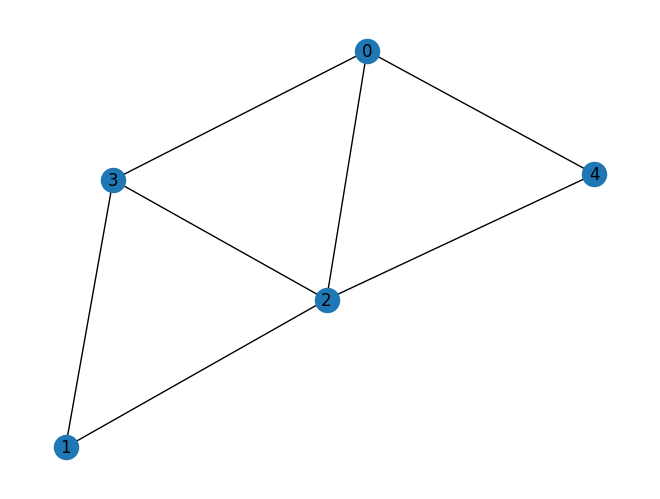


Number of nodes: 5
Number of edges: 7
Is graph connected: True
Diameter: 2
Radius: 1
Is bipartite False
Average degree: 2.8
    
Adjacency matrix:
[0 0 1 1 1]
[0 0 1 1 0]
[1 1 0 1 1]
[1 1 1 0 0]
[1 0 1 0 0]


,Node,Degree,Betweenness,Closeness,Clustering
0,0,3,0.083333,0.800000,0.666667
1,1,2,0.000000,0.666667,1.000000
2,2,4,0.333333,1.000000,0.500000
3,3,3,0.083333,0.800000,0.666667
4,4,2,0.000000,0.666667,1.000000


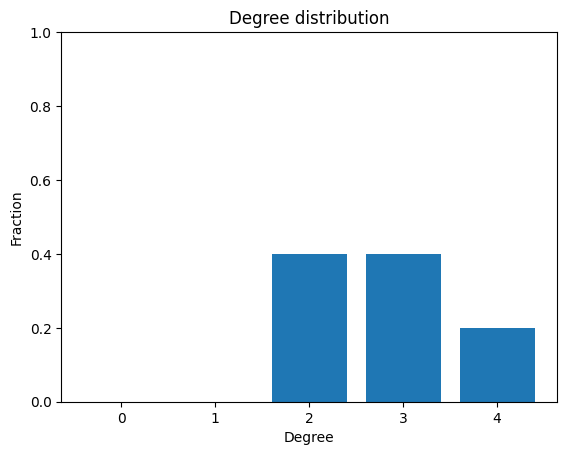

In [143]:
N = 5  # Number of nodes
E = 7  # Number of edges

ER = nx.gnm_random_graph(N, E)
gen_plot(ER, name=f"ER_G({N},{E})", gen_html=False)
properties(ER)


In [167]:
# nx.average_degree_connectivity(ER)
# list(nx.preferential_attachment(ER)) # An iterator of 3-tuples in the form (u, v, p) where (u, v) is a pair of nodes and p is their preferential attachment score
# nx.community.modularity(ER, nx.community.label_propagation_communities(ER))


1.1102230246251565e-16

## Barabasi-Albert (BA) network:

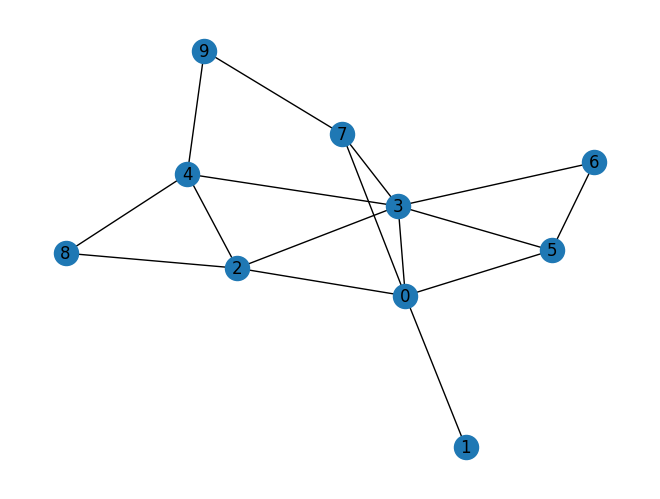


Number of nodes: 10
Number of edges: 16
Is graph connected: True
Diameter: 3
Radius: 2
Is bipartite False
Average degree: 3.2
    
Adjacency matrix:
[0 1 1 1 0 1 0 1 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 1 1 0 0 0 1 0]
[1 0 1 0 1 1 1 1 0 0]
[0 0 1 1 0 0 0 0 1 1]
[1 0 0 1 0 0 1 0 0 0]
[0 0 0 1 0 1 0 0 0 0]
[1 0 0 1 0 0 0 0 0 1]
[0 0 1 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 1 0 0]


,Node,Degree,Betweenness,Closeness,Clustering,Neighborhood connectivity
0,0,5,0.289352,0.692308,0.300000,3.400000
1,1,1,0.000000,0.428571,0.000000,5.000000
2,2,4,0.143519,0.642857,0.500000,4.250000
3,3,6,0.328704,0.750000,0.333333,3.500000
4,4,4,0.143519,0.600000,0.333333,3.500000
5,5,3,0.027778,0.529412,0.666667,4.333333
6,6,2,0.000000,0.473684,1.000000,4.500000
7,7,3,0.101852,0.562500,0.333333,4.333333
8,8,2,0.000000,0.450000,1.000000,4.000000
9,9,2,0.020833,0.473684,0.000000,3.500000


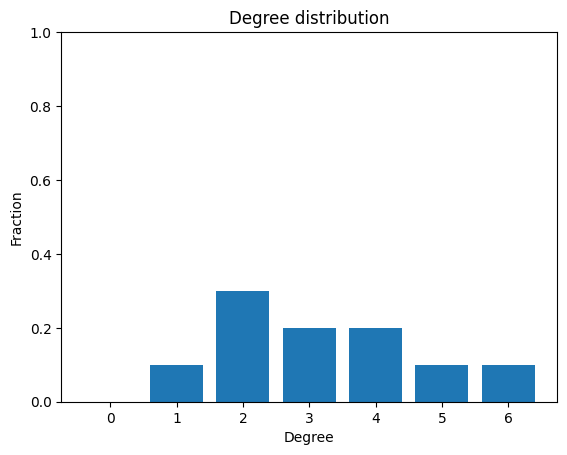

In [160]:
N = 10  # Number of nodes
m = 2  # Minimum number of edges per node

BA = nx.barabasi_albert_graph(N, m)
gen_plot(BA, name=f"BA_G({N},{m})", gen_html=False)
properties(BA)

## Watts-Strogatz (WS) network

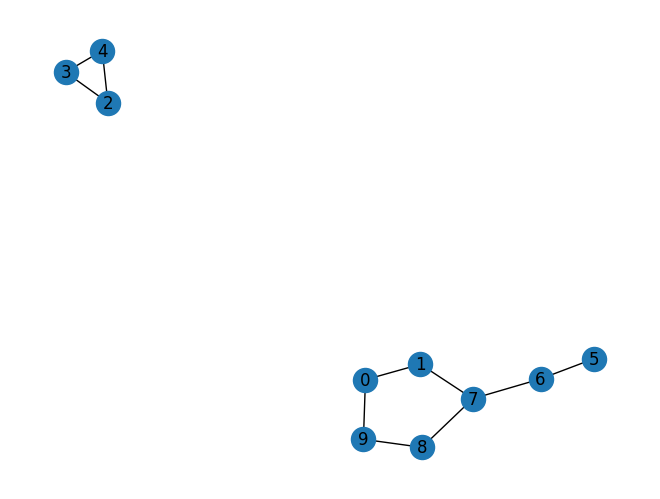


Number of nodes: 10
Number of edges: 10
The graph is not connected, so the following (text) only applies to the largest component!
Diameter: 4
Radius: 2
Is bipartite False
Average degree: 2.0
    
Adjacency matrix:
[0 1 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 0 0]
[0 0 0 1 1 0 0 0 0 0]
[0 0 1 0 1 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 1 0 0]
[0 1 0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 0 1 0 1]
[1 0 0 0 0 0 0 0 1 0]


,Node,Degree,Betweenness,Closeness,Clustering
0,0,2,0.027778,0.307692,0.0
1,1,2,0.083333,0.363636,0.0
2,2,2,0.000000,0.222222,1.0
3,3,2,0.000000,0.222222,1.0
4,4,2,0.000000,0.222222,1.0
5,5,1,0.000000,0.235294,0.0
6,6,2,0.138889,0.333333,0.0
7,7,3,0.250000,0.444444,0.0
8,8,2,0.083333,0.363636,0.0
9,9,2,0.027778,0.307692,0.0


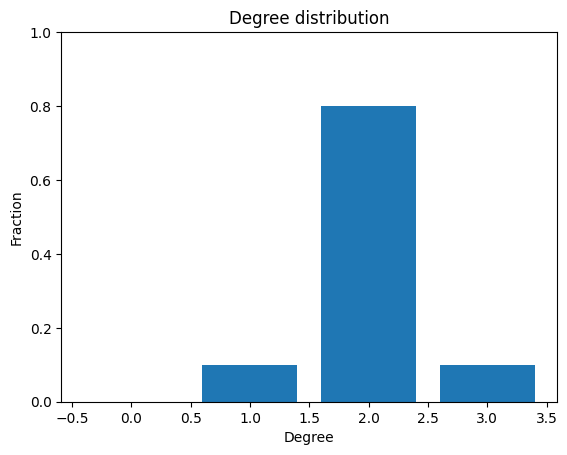

In [145]:
N = 10
k = 2
p = 0.1

WS = nx.watts_strogatz_graph(N,k,p)
gen_plot(WS, name=f"WS_G({N},{k},{p})", gen_html=False)
properties(WS)